In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
def initiate_position(N, M):
    N_circle = np.zeros(N)
    for i in range(M):
        N_circle[i] = 1
    return N_circle

In [3]:
#find movable location:
def find_movable_cars(N_circle, N):
    movable_car_index = []
    for i in range(N): #i is the locatio of the cars
        #cannot be last i
        if i != N-1:
            if N_circle[i] == 1 and N_circle[i+1] == 0:
                #movable
                movable_car_index.append((i, i+1))
        else: #when i is the last loc
            if N_circle[i] == 1 and N_circle[0] == 0:
                movable_car_index.append((i, 0))
    return movable_car_index

In [4]:
def move_cars(N_circle, movable_cars):
    move_car = movable_cars[np.random.choice(range(len(movable_cars)))]
    N_circle[move_car[0]] = 0
    N_circle[move_car[1]] = 1
    return N_circle

# Run

In [29]:
# define 
N = 25
M = 10
T = 50

In [30]:
A_averages = []
S_averages = []
repeat = 999999
As = []
Ss = []
for kkkkk in range(repeat):
    car_circle = initiate_position(N, M)
    t = T
    while t:
        movable_cars = find_movable_cars(car_circle, N)
        car_circle = move_cars(car_circle, movable_cars)
        t -= 1
    A = np.dot(np.array(range(N)),car_circle)/M
    S = np.sqrt(np.dot(np.square(np.array(range(N))), car_circle)/M - np.square(A))
    As.append(A)
    Ss.append(S)

In [31]:
df = pd.DataFrame(index=range(len(As)), columns=['A','S'], data={'A':As,'S':Ss})

9.237617237617238
6.109172547142578


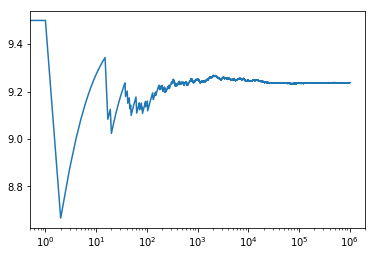

In [32]:
plt.plot(df.expanding().mean()['A'])
plt.xscale('log')
print(df.A.mean())
print(df.S.mean())

In [33]:
print(df.A.std())
print(df.S.std())

0.7662981007901972
0.8308611146810813


In [34]:
%%timeit
df.A.std()

4.86 ms ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
np.std(As)

56.2 ms ± 527 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
